In [ ]:
'''
Neural network classification
Programming team : Oktawian Filipkowski, Maciej Zakrzewski
For first exercise we will compare results and accuracy of neural network with 
our method form previous task.
We chose decision trees from last task.
We also created confusion matrix and compared results, and later compared them.
Creating imports and checking version
'''
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import itertools
import tensorflow as tf
print(tf.__version__)

2.9.2


In [ ]:
'''
Importing dataset
'''
suv = pd.read_csv("suv_data.csv")

In [ ]:
'''
Once again we are dropping columns useless for us like last time, 
since we are going to compare results. 
But if we had been using all columns we would need to convert
non-numerical data to numerical one.
'''
suv = suv [ [ "Age","EstimatedSalary","Purchased"] ]

In [ ]:
'''
Creating train/test split
'''
X = suv.iloc[:, :-1].values
y = suv.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [ ]:
'''
Now we create and build fit model.
'''
tf.random.set_seed(42)

suv_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
])

suv_model.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), 
                          metrics=['accuracy'])

history = suv_model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
'''
Now we check accuracy of our model, its nothing special
'''
suv_model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 6ms/step - loss: 7.4709 - accuracy: 0.7250


[7.470919609069824, 0.7250000238418579]

In [ ]:
'''
We try to increase training length to increase accuracy
Longer training should increase accuracy
But it actually decreased accuracy
'''
suv_model.fit(X, y, epochs=200, verbose=0)
suv_model.evaluate(X, y)

13/13 [==============================] - 0s 5ms/step - loss: 11.4020 - accuracy: 0.6425


[11.40195083618164, 0.6424999833106995]

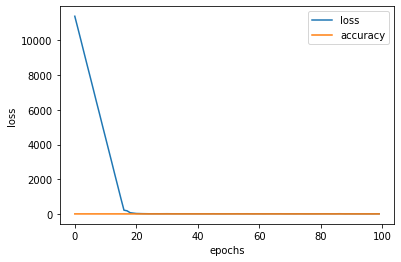

In [ ]:
'''
Visualization of plot history aka loss curve
'''
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [ ]:
'''
We will now change strategy, we will increase number of layers 
to improve our model accuracy
'''
tf.random.set_seed(42)


suv_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), 
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1) 
])

suv_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['accuracy'])


In [ ]:
'''
Now we check accuracy of our model, its tragic.
In this case increasing number of layers decreased accuracy
to the point that guessing would be probably better
'''
suv_model_2.evaluate(X_test, y_test)

3/3 [==============================] - 1s 6ms/step - loss: 1172.8767 - accuracy: 0.3500


[1172.876708984375, 0.3499999940395355]

In [ ]:
'''
For binary classification output layer activation is usually more accurate with 
sigmoid function.
We will check if our model will improve using this method
'''
tf.random.set_seed(42)

suv_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), 
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), 
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) 
])

suv_model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history = suv_model_3.fit(X, y, epochs=100, verbose=0)

In [ ]:
'''
Not much improved, while our model is working its accuracy is not that great
'''
suv_model_3.evaluate(X, y)

13/13 [==============================] - 0s 2ms/step - loss: 10.9844 - accuracy: 0.6425


[10.984362602233887, 0.6424999833106995]

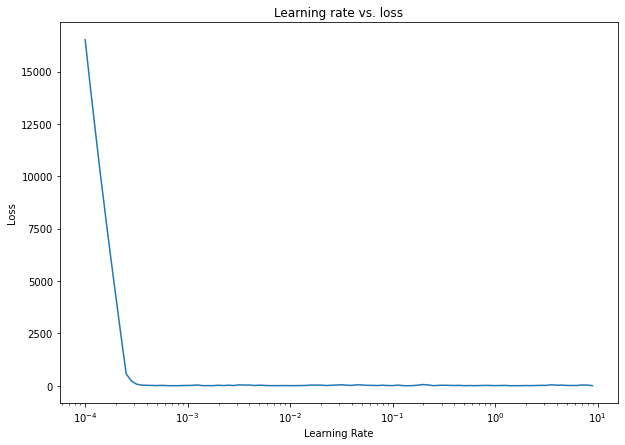

In [ ]:
'''
Another visualization,
Plot the learning rate versus the loss
'''
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) 
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [ ]:
'''
We will now sumarize and check accuracy of our model
'''
loss, accuracy = suv_model.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

3/3 [==============================] - 0s 4ms/step - loss: 11.0581 - accuracy: 0.6500
Model loss on test set: 11.058095932006836
Model accuracy on test set: 65.00%


In [ ]:
'''
Creating confusion matrix for one of our underperforming models
we need to use tf.round otherwise we will get an error
'''
y_preds = suv_model_3.predict(X_test)
confusion_matrix(y_test, tf.round(y_preds))

3/3 [==============================] - 0s 4ms/step


array([[52,  0],
       [28,  0]])

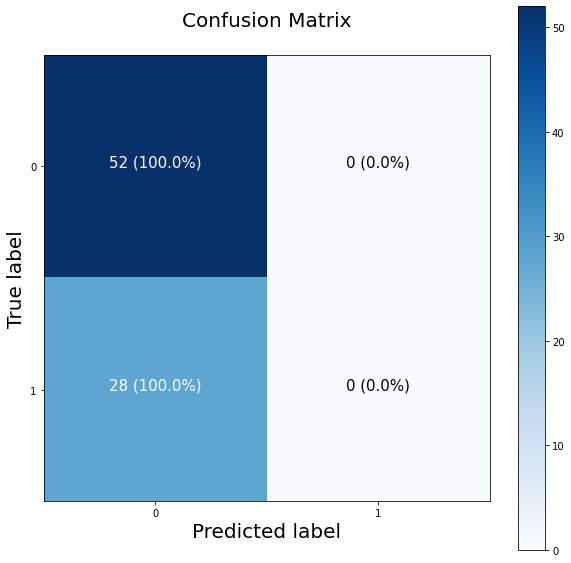

In [ ]:
'''
Prettier version of visualization
While this CM is meme-worthy its still part of exercise.
'''

figsize = (10, 10)

cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] 
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues) 
fig.colorbar(cax)

classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

threshold = (cm.max() + cm.min()) / 2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [ ]:
'''
Now let's compare our resoults with other ML method, SVM model
For our second dataset we will use suv purchase data:
Link: https://www.kaggle.com/datasets/iamaniket/suv-data
We will try to predict if customer buys a car, using his income and age data
'''
dataset2 = pd.read_csv('suv_data.csv')
dataset2.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
'''
To make some changes (otherwise 2nd part of exercise would be identical to 1st) we will drop
User ID and Gender columns. User ID is not needed in this particular case and as an 
avid feminist Marcin Zakrzewski believes that Gender is an social construct and as such should be dropped.
'''
dataset2=dataset2 [ [ "Age","EstimatedSalary","Purchased"] ]
print(dataset2)


     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]


In [ ]:
'''
Again we create train and test set, split dataset (this time 75 to 25).
'''
X = dataset2.iloc[:, :-1].values
Y = dataset2.iloc[:, -1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

Accuracy:  0.91


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[62,  6],
       [ 3, 29]])

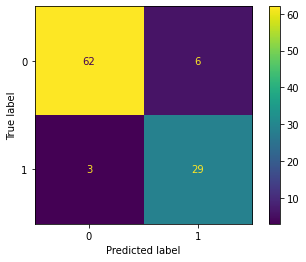

In [ ]:
clf2 = tree.DecisionTreeClassifier()
clf2.fit (X_train, Y_train)

Y_pred = clf2.predict(X_test)
ac = accuracy_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)

plot_confusion_matrix(clf2,X_test, Y_test)

print("Accuracy: ", ac)
cm



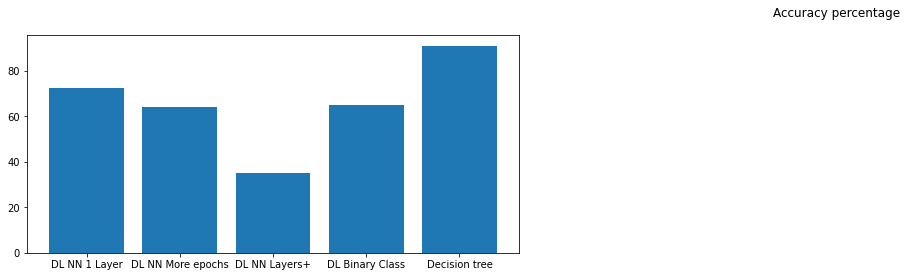

In [ ]:
'''
Now lets sum it up :
Difference is staggering, our decision tree classifier is very accurate.
This is something we werent able to achieve using neural network, even
though we tried 3 different approaches.
Why?
Because ML and DL are a little bit different.
While we can use ML and DL to resolve this problem, both algorythms 
excel at different things.
In simplest terms :
Machine learning is better when working with structured data and deep learning
is better when worrking with unstructured data.
Best example of structured data is our excel sheet with structured data - rows and
columns.
Unstructured data is (for example) natural language text or pictures.
To finish, lets create a plot which will compare accuracy of our methods
'''
names = ['DL NN 1 Layer', 'DL NN More epochs', 'DL NN Layers+','DL Binary Class','Decision tree']
values = [72.5, 64.25, 35, 65, 91]

plt.figure(figsize=(30, 4))
plt.subplot(131)
plt.bar(names, values)
plt.suptitle('Accuracy percentage')
plt.show()